In [44]:
import pandas as pd, numpy as np
import random
import numpy.linalg as la
import matplotlib.pyplot as plt
from matplotlib.image import imread

#### Recordar: 
**TODA** matriz simétrica $A$ puede descomponerse como:

$$
A = E\Lambda E^{T}
$$

donde $E$ es una matrix ortogonal cuyas columnas son los eigenvectores de $A$, $\Lambda$ una matriz diagonal que contiene los eigenvalores de $A$, y se cumple que $EE^{T} = E^{T}E= I$

Esta factorización es útil, pero tiene la 'limitante' que sólo es para matrices simétricas, 
y en su forma más general, para matrices cuadradas.

### Existe una factorización muy importante, que además aplica para cualquier matriz

#### Descomposición en Valores Singulares (Singular Value Decomposition -SVD) 

Se aplica a cualquier matriz de tamaño $m \times n$ y proporciona una forma de descomponer dicha matriz en el producto de tres matrices más simples.

**Explicación:**

Consideremos una matriz $A$ de tamaño $m \times n$. La SVD descompone $A$ en tres matrices:

$$ A = U \Sigma V^T $$

1. **$U$**: Esta es una matriz ortogonal de $m \times m$. Las columnas de $U$, conocidas como los vectores singulares izquierdos, son eigenvectores de $AA^T$.

2. **$\Sigma$**: Esta es una matriz **diagonal** de $m \times n$ (no necesariamente cuadrada). Los elementos no cero de $\Sigma$, que están en la diagonal, se conocen como los valores singulares de $A$. Estos valores singulares son las raíces cuadradas de los eigenvalores de $A^TA$ y $AA^T$. Siempre son no negativos y generalmente se organizan en orden descendente. El número de valores singulares no cero es igual al rango de la matriz $A$.

**Nota:** Rango de una matriz =  número máximo de columnas linealmente independientes

3. **$V^T$**: Esta es la transpuesta de una matriz ortogonal de $n \times n$. Las columnas de $V$ (y por lo tanto las filas de $V^T$) son los vectores singulares derechos de $A$ y son eigenvectores de $A^TA$.

**Importancia y Aplicaciones:**

- **Reducción de Dimensionalidad**: En aplicaciones como el Análisis de Componentes Principales (PCA), el SVD se utiliza para la reducción de dimensionalidad. Solo se conservan los primeros valores singulares (que son los más grandes) y sus correspondientes vectores singulares.

- **Pseudoinversa**

- **Compresión de Datos**

#### Relación PCA con SVD

Como $ A = U \Sigma V^T $, entonces $ A^TA = V \Sigma^T U^T  U \Sigma V^T $

Como $U$ es una matriz ortogonal, se sigue que $U^T  U = I$, y entonces la expresión se convierte en:

$$
A^TA = V \Sigma^T\Sigma V^T = V \Lambda V^T \; \text{con} \; \Sigma^T\Sigma= \Lambda
$$

que es justo la 'eigendescomposición' de la matriz simétrica $A^TA$ del Teorema Espectral

En python usamos la funcion `svd()` de la librería linear algebra

### Ejemplo:

In [2]:
A=np.array([
    [1,2,3],
    [4,5,6]
])

In [3]:
U, Sig, Vt = la.svd(A)

In [4]:
U

array([[-0.3863177 , -0.92236578],
       [-0.92236578,  0.3863177 ]])

In [5]:
Sig

array([9.508032  , 0.77286964])

In [6]:
Sig=np.diag(Sig)
Sigma=np.hstack([Sig,np.zeros((2,1))])#horizontal stack: "apila hacia la derecha'
Sigma

array([[9.508032  , 0.        , 0.        ],
       [0.        , 0.77286964, 0.        ]])

In [7]:
Vt

array([[-0.42866713, -0.56630692, -0.7039467 ],
       [ 0.80596391,  0.11238241, -0.58119908],
       [ 0.40824829, -0.81649658,  0.40824829]])

In [8]:
U@Sigma@Vt

array([[1., 2., 3.],
       [4., 5., 6.]])

Esta factorización, al igual que la diagonalización de matrices simétricas, descompone
la acción de una matriz $M$ en 3 pasos: 
    1. Rotación
    2. Escalamiento y rotación
    3. Otra Rotación

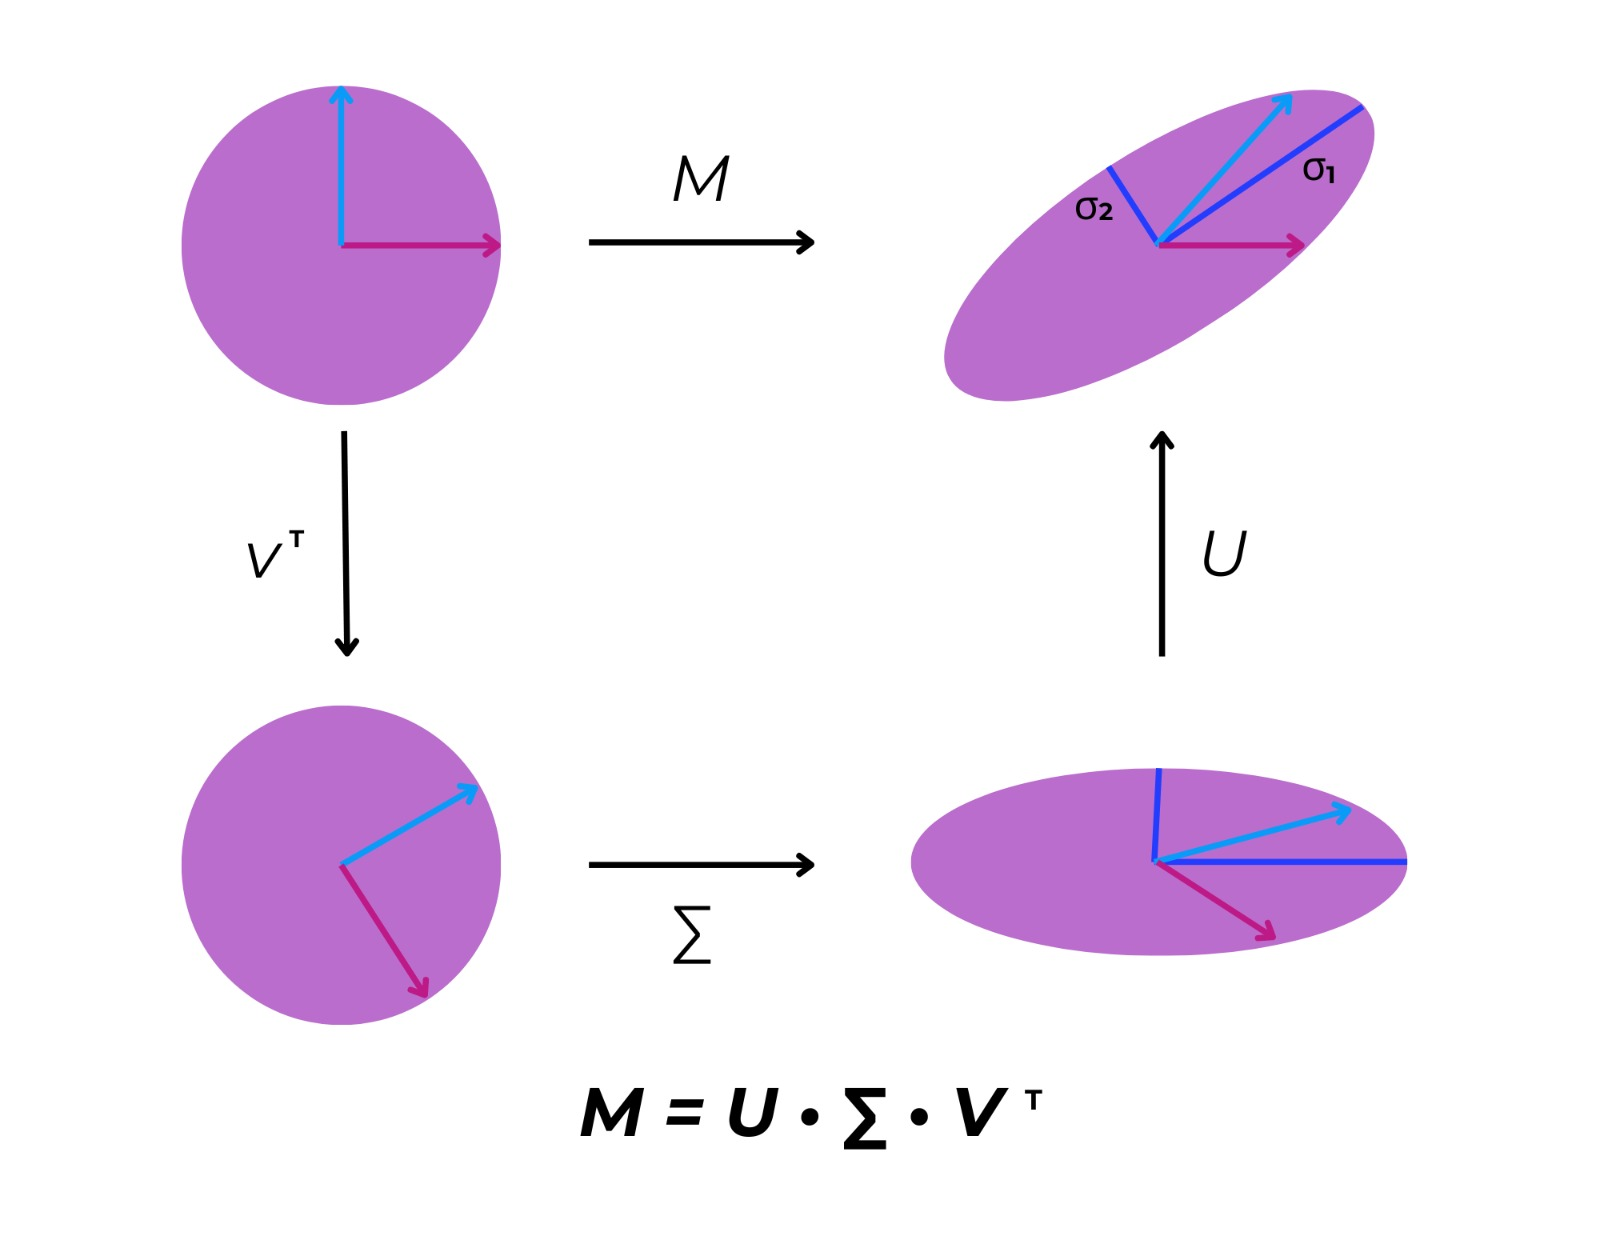

In [9]:
#función para graficar el efecto de multiplicar una matriz por un vector
def graf_matmul(A,v):
    C=A
    v3=v
    #multiplicación
    resulting_v3=np.dot(C,v3)

    #Crear la gráfica
    plt.figure(figsize=(8,6))
    plt.quiver(0,0,v3[0],v3[1],angles='xy',scale_units='xy',scale=1,color='blue',label=r'$\mathbf{v}$')
    plt.quiver(0,0,resulting_v3[0],resulting_v3[1],angles='xy',scale_units='xy',scale=1,color='red',label=r'$\mathbf{Av}$')
    
    #Límites
    plt.xlim(-10,10)
    plt.ylim(-10,10)
    plt.gca().set_aspect('equal',adjustable='box')
    
    #Agregar cuadrícula, etiquetas,títulos y leyendas. 
    plt.grid(True)
    plt.axhline(y=0,color='k')
    plt.axvline(x=0,color='k')
    plt.xlabel('eje X')
    plt.ylabel('eje Y')
    plt.title('Efecto de multiplizar la matrix C por el vector (3,2)')
    plt.legend()

    #mostrando el gráfico
    plt.show()
    print(resulting_v3)

In [10]:
A

array([[1, 2, 3],
       [4, 5, 6]])

In [11]:
Vt

array([[-0.42866713, -0.56630692, -0.7039467 ],
       [ 0.80596391,  0.11238241, -0.58119908],
       [ 0.40824829, -0.81649658,  0.40824829]])

In [12]:
Sigma

array([[9.508032  , 0.        , 0.        ],
       [0.        , 0.77286964, 0.        ]])

In [14]:
U

array([[-0.3863177 , -0.92236578],
       [-0.92236578,  0.3863177 ]])

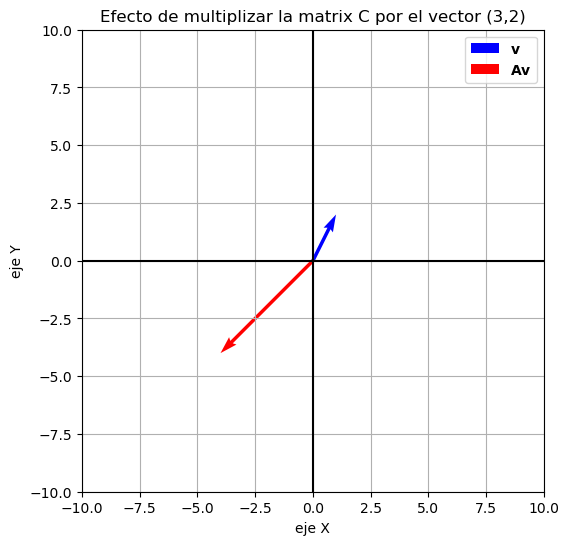

[-4 -4]






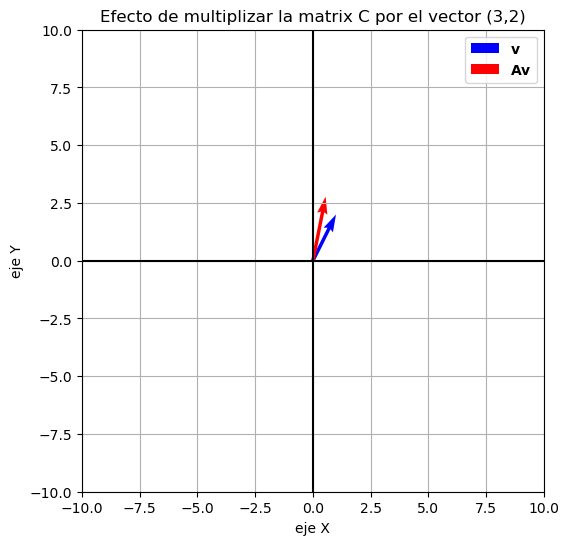

[ 0.55055914  2.77432598 -2.44948974]


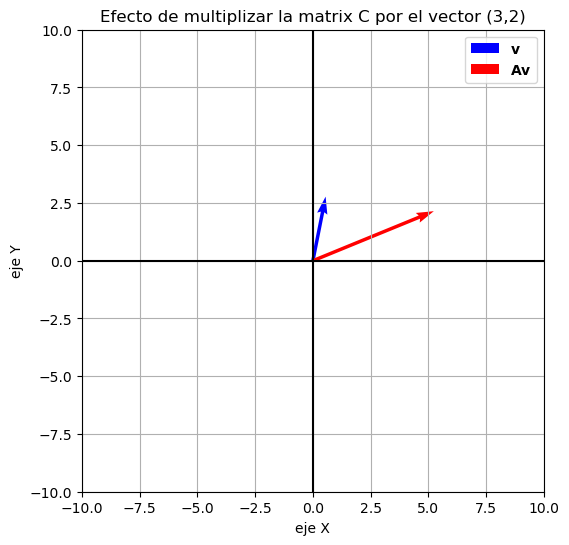

[5.23473393 2.14419231]


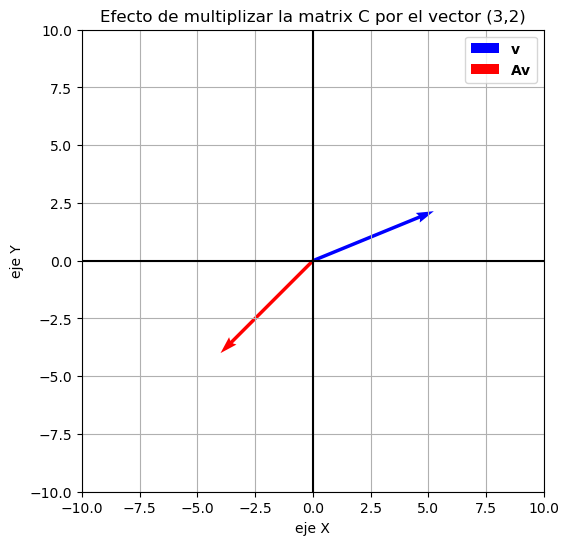

[-4. -4.]


In [15]:
v=np.array([1,2,-3])
graf_matmul(A,v)
print("\n"*3)
graf_matmul(Vt,v)
graf_matmul(Sigma,Vt@v)
graf_matmul(U,Sigma@Vt@v)

Así como en PCA tomamos sólo algunos componentes principales para reducir la dimensión de un problema, con SVD podemos hacer algo similar al tomar sólo algunos algunos vectores y valores SINGULARES de la factorización para **aproximar** a la matriz.

### Una aplicación de SVD

In [2]:
plt.rcParams["figure.figsize"]=[16,8]


In [10]:
A=imread("Tiger_pic.png")#es un arreglo. este arreglo típicamente tiene esta forma (height,widh,3), para una imagen en RGB, la última dimensión
#representa los tres canales de colores (rojo, verde y azul)
A
#jpeg(rgb)
#png (rgba)

array([[[0.42745098, 0.5137255 , 0.2627451 , 0.9843137 ],
        [0.42352942, 0.5137255 , 0.2627451 , 0.9843137 ],
        [0.4392157 , 0.5176471 , 0.26666668, 0.9843137 ],
        ...,
        [0.34901962, 0.34509805, 0.21176471, 0.9843137 ],
        [0.34509805, 0.34901962, 0.21176471, 0.9843137 ],
        [0.34901962, 0.3529412 , 0.21176471, 0.9843137 ]],

       [[0.4392157 , 0.52156866, 0.2627451 , 1.        ],
        [0.42352942, 0.5254902 , 0.25882354, 1.        ],
        [0.44313726, 0.52156866, 0.25882354, 1.        ],
        ...,
        [0.33333334, 0.34117648, 0.20784314, 1.        ],
        [0.34117648, 0.34509805, 0.20392157, 1.        ],
        [0.34901962, 0.3529412 , 0.21568628, 1.        ]],

       [[0.43137255, 0.5372549 , 0.24313726, 1.        ],
        [0.4509804 , 0.5372549 , 0.2509804 , 1.        ],
        [0.45490196, 0.5411765 , 0.23921569, 1.        ],
        ...,
        [0.33333334, 0.34117648, 0.20392157, 1.        ],
        [0.34509805, 0.349019

In [16]:
600*600*4

1440000

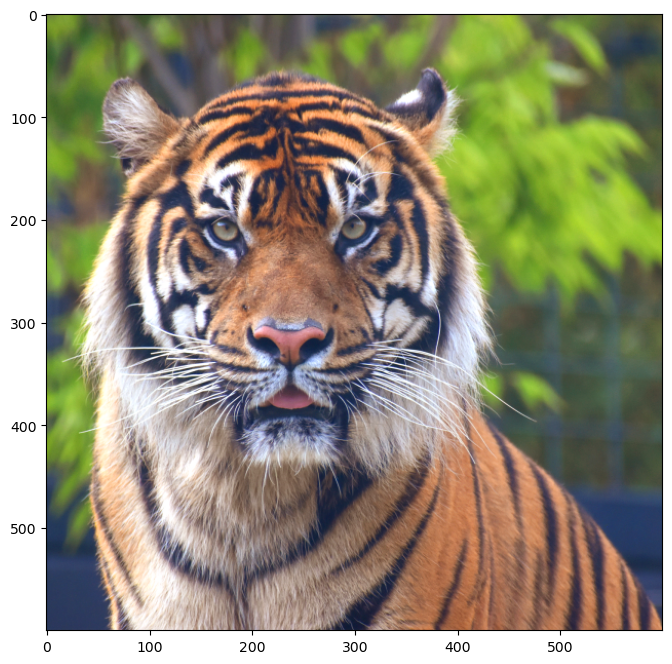

In [12]:
plt.imshow(A)

In [11]:
A.shape

(600, 600, 4)

In [6]:
X=np.mean(A,-1)#convierte la imagen de colores a grises. calcula el promedio a lo largo del último eje (los canales de colores) de la imagen 
#en el arreglo. En pocas palabras, promedia el Rojo, Verde y Azul para cada uno de los pixeles para producir un valor de intensidad singular. 
#Este resultado en 2 dimensiones de (altura,ancho) representa la versión en gris de la imagen. 
X.shape


(600, 600)

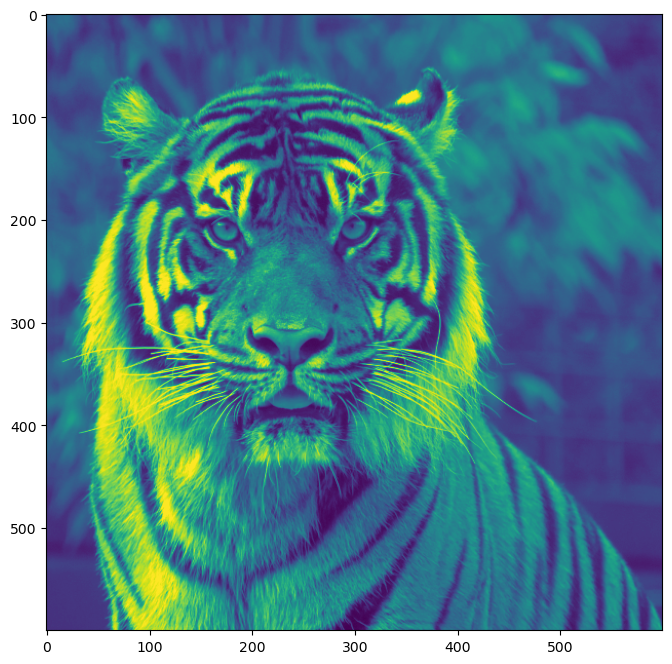

In [13]:
plt.imshow(X)

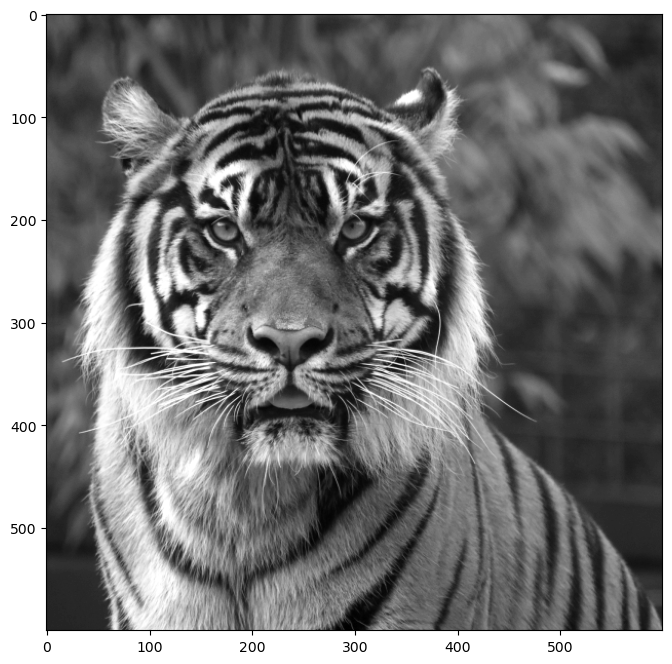

In [14]:
img=plt.imshow(X) #promedio de los colores
img.set_cmap('gray') #obligan a que sea gris


In [17]:
U,S,Vt=la.svd(X)

In [20]:
U.shape

(600, 600)

In [18]:
S=np.diag(S)

In [21]:
S.shape

(600, 600)

In [22]:
Vt.shape

(600, 600)

In [19]:
X.shape

(600, 600)

In [23]:
U[:,:5].shape

(600, 5)

In [25]:
S[:5,:5].shape

(5, 5)

In [27]:
Vt[:5,:].shape

(5, 600)

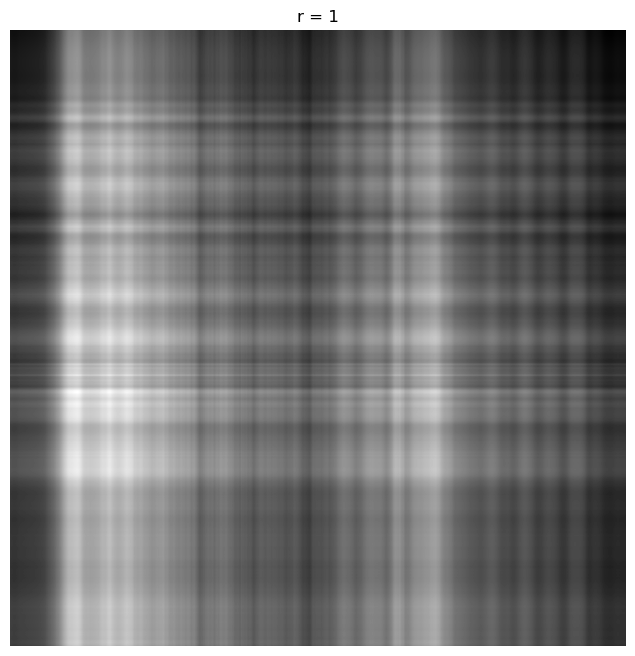

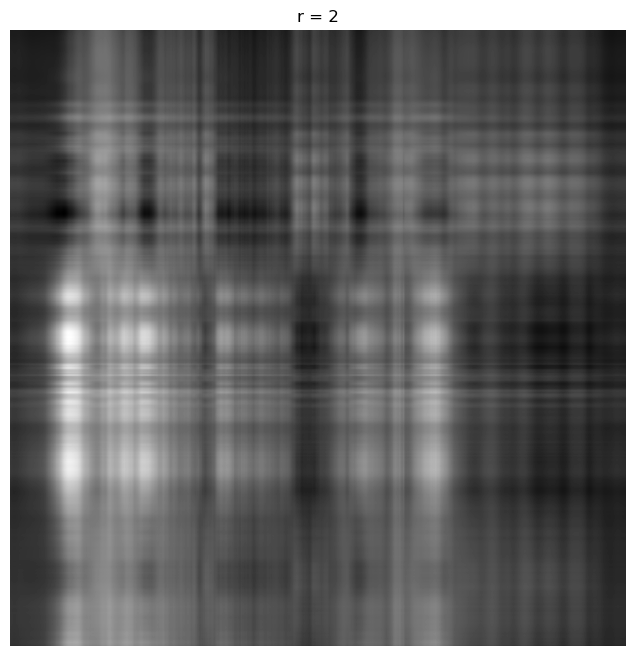

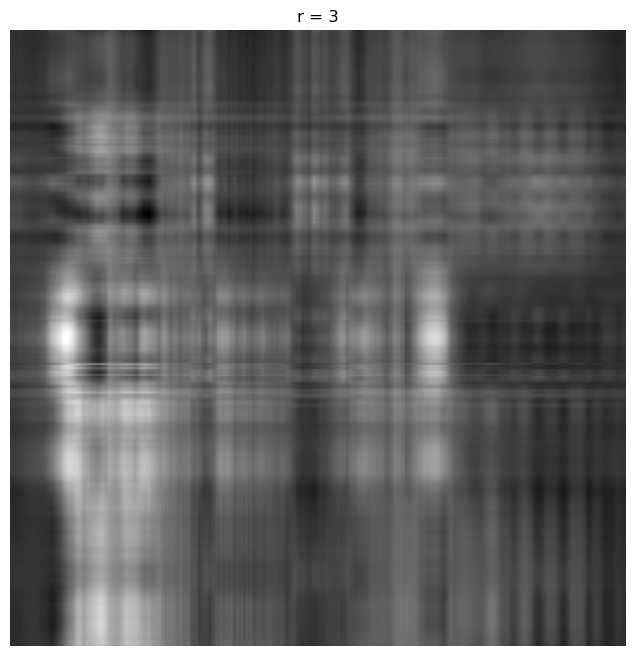

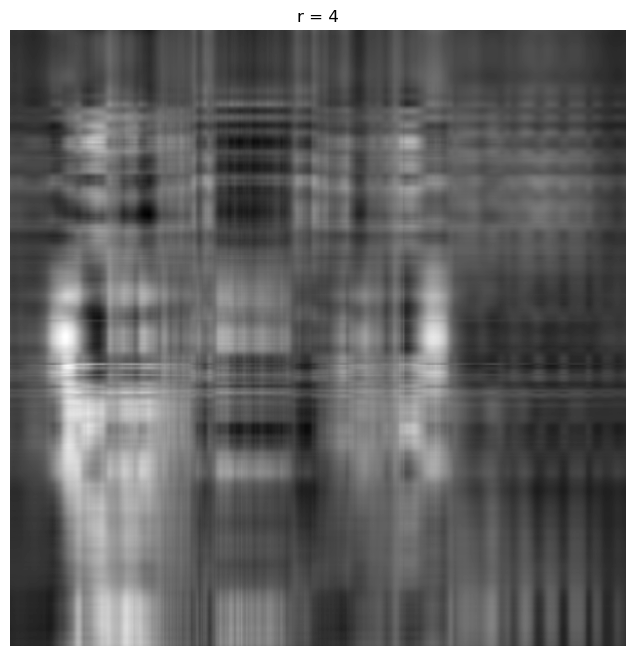

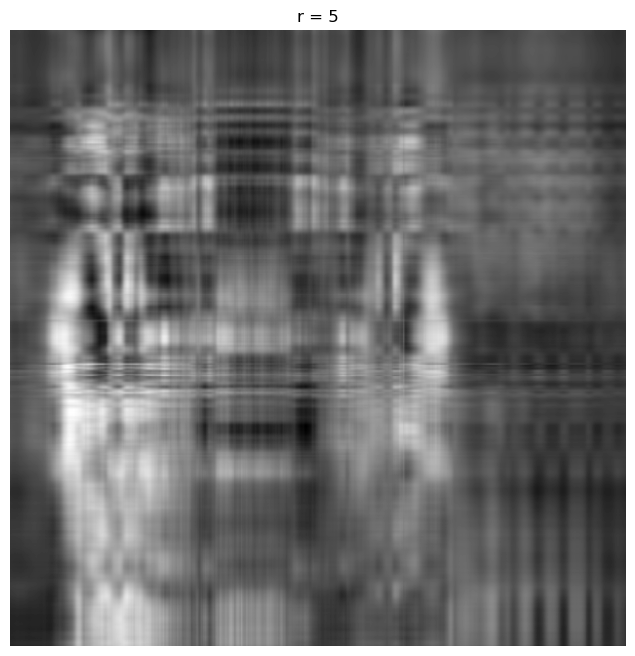

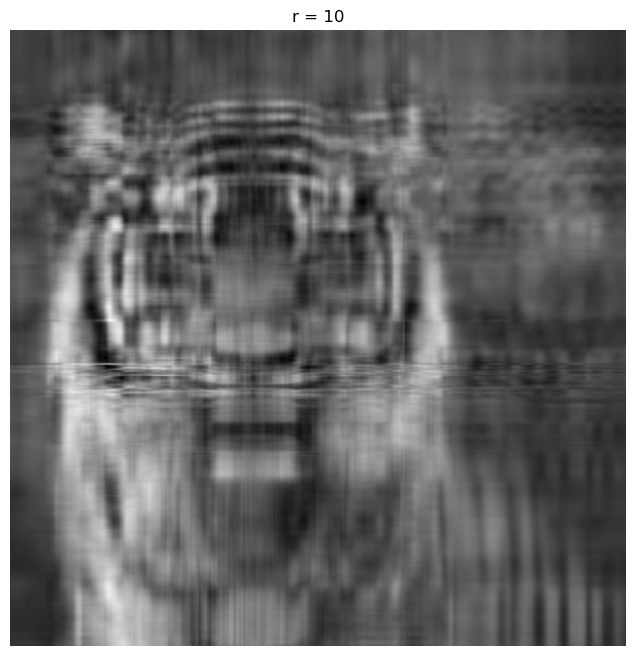

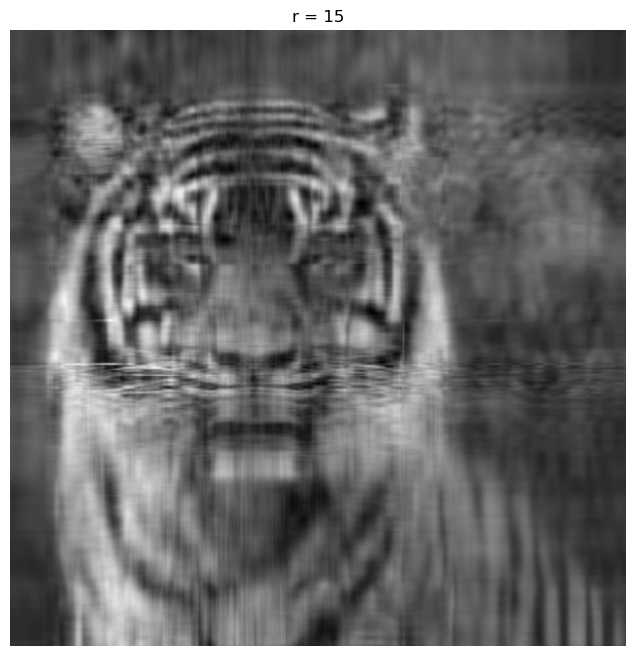

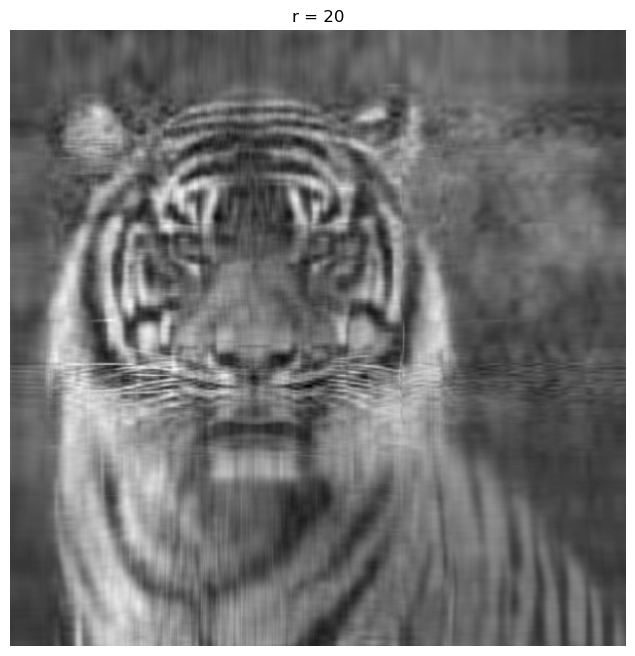

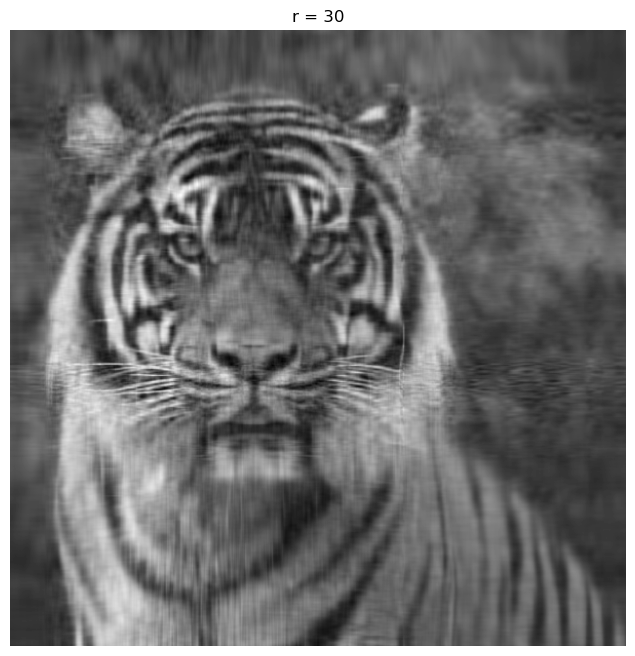

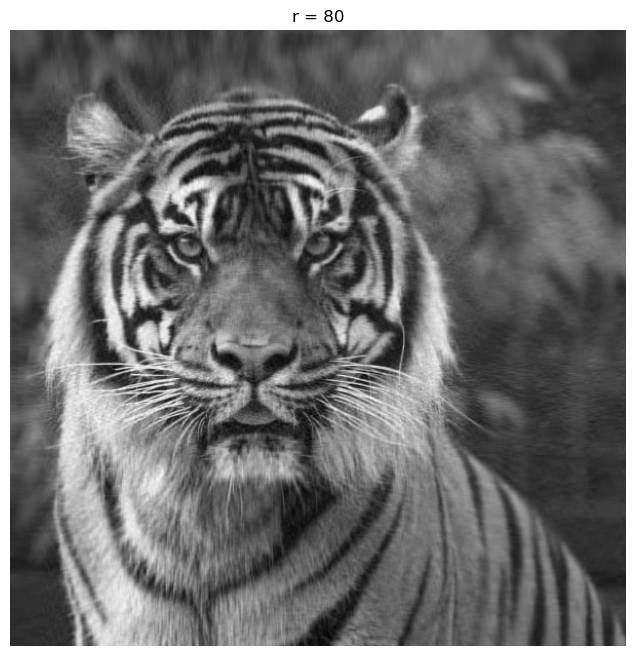

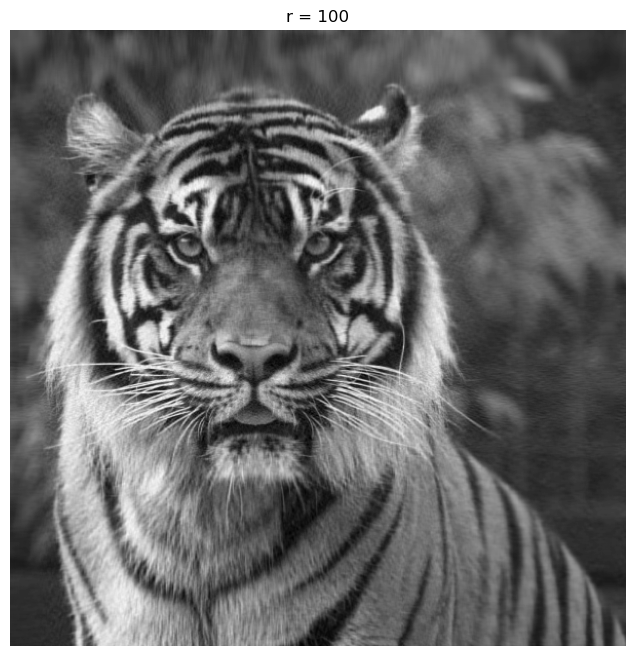

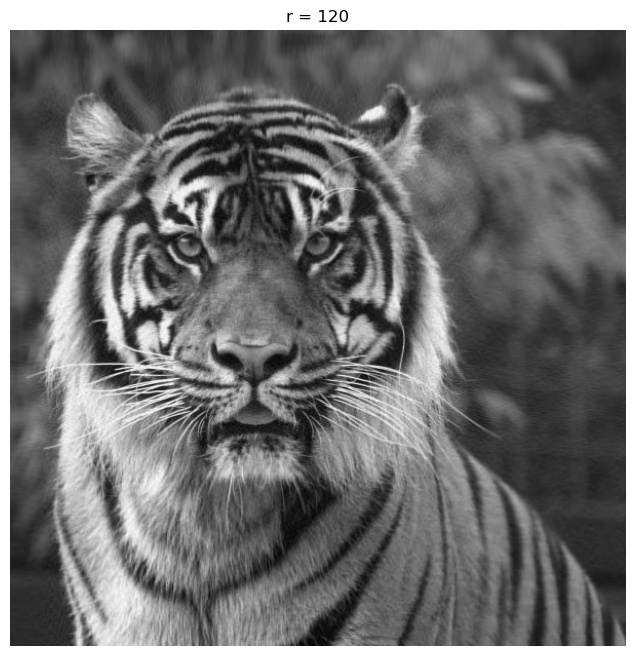

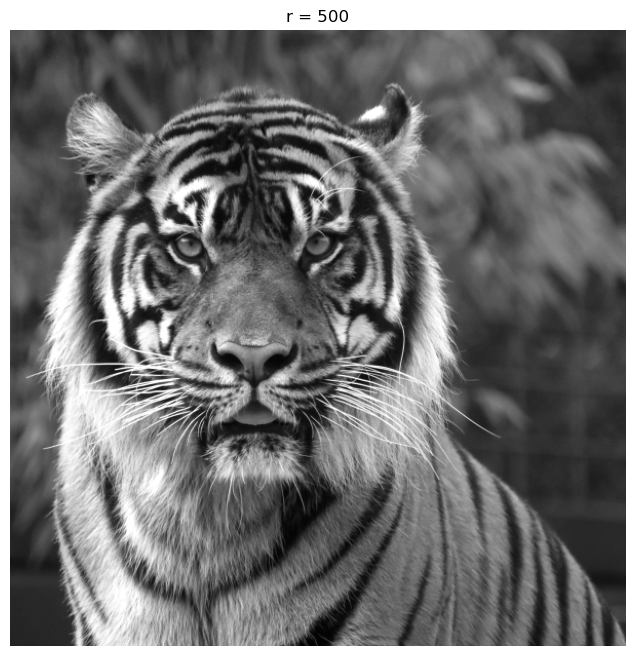

In [28]:
for r in (1,2,3,4,5,10,15,20,30,80,100,120,500):#va hasta 500, porque lo más tenemos 600 columnas
    #construir la aproximación de rango r de la imagen (de la matriz X): 
    X_approx=U[:,:r]@S[:r,:r]@Vt[:r,:] #es una aproxmación a la matriz X.
    img=plt.imshow(X_approx)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()

# Otro ejercicio de SVD

In [45]:
#pip install tensorflow

In [46]:
from tensorflow.keras import datasets

In [47]:
import tensorflow as tf

In [48]:
print(tf.__version__)
#pip install tensorflow==2.16.1

2.16.1


In [49]:
train, test= datasets.mnist.load_data() #contiene dígitos (0 a 9) escritos a mano. 

In [50]:
xtrain, ytrain=train
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [51]:
xtrain.shape #28x28 pixeles

(60000, 28, 28)

In [52]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [53]:
np.unique(ytrain) #10 categorías

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [54]:
len(xtrain)

60000

In [55]:
xtrain[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

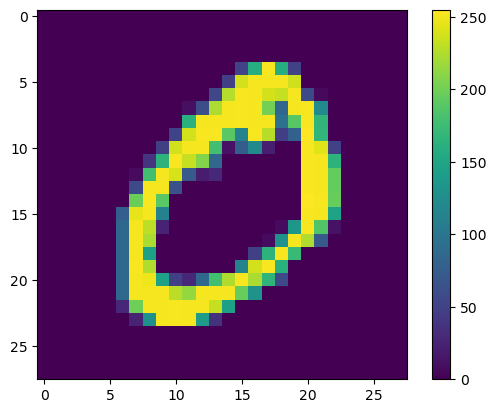

In [56]:
plt.imshow(xtrain[1])
plt.colorbar()

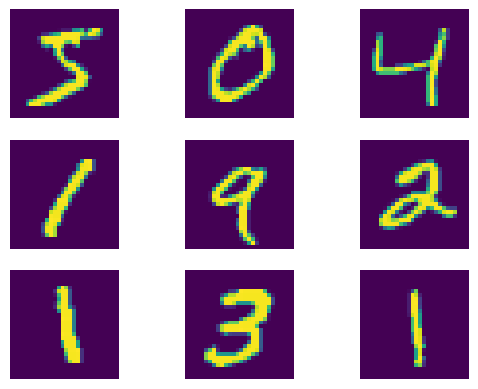

In [57]:
np.random.seed(3141)
indices=[0,1,2,3,4,5,6,7,8,9]
fig, ax= plt.subplots(3,3)
for axi, ix in zip(ax.ravel(),indices):
    axi.imshow(xtrain[ix])
    axi.axis("off")

In [58]:
ax

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

In [59]:
ax.shape

(3, 3)

In [60]:
ax.ravel() #qué hace el rave. 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >], dtype=object)

In [61]:
ax.ravel().shape #lo aplana o lo vectoriza

(9,)

### Descomposición de Valores Singulares

$$
\begin{aligned}
    X &= U\Sigma V^T \\
      &= Z V^T
\end{aligned}
$$

In [62]:
xtrain.shape

(60000, 28, 28)

In [63]:
N,M1,M2=xtrain.shape
N,M1,M2

(60000, 28, 28)

In [64]:
28*28 #784 entradas de i,j

784

In [65]:
xtrain.reshape(N,-1) #cada renglón será una imagen y estaráen una dimensión de 60,000 x 784

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [66]:
xtrain.reshape(N,-1).shape

(60000, 784)

In [67]:
#reshape se utiliza para cambiar las dimensiones de un Numpy Array. 
#reshape(N,-1) ; N representa el número de imágenes. 
# -1 le dice a python que infiera el tamaño de la dimensión basado en las otras dimensiones. calcula el tamaña apopiado. 
#cuando estamos usado reshape(n,-1) estamos aplanando acada de Dimension 2D (28x28) a una Dimensón (1D) 

In [68]:
#voy a tomar la mitad de los datos para hacerlo un poco más rápido
int(N*.5)

30000

In [69]:
N,M1,M2=xtrain.shape
X=xtrain.reshape(N,-1)[:int(N*.5)]#tomar menos datos

In [70]:
X.shape

(30000, 784)

In [71]:
y=ytrain[:int(N*.5)]

In [72]:
y.shape

(30000,)

In [73]:
#PCA o SVD sugiere estandarizar los datos. 
#vamos a generar una observación representativa estandarizada (media de las observaciones)

mu=X.mean(axis=0,keepdims=True) #promedio por columna. axis=0 (promeido por columna)
mu.shape

(1, 784)

In [74]:
mu

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.20000000e-03, 1.56666667e-02, 7.20000000e-03, 3.00000000e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.66666667e-04, 1.85000000e-02, 4.50333333e-02,
        5.52000000e-02, 7.26333333e-02, 8.98666667e-02, 1.16833333e-01,
        1.47933333e-01, 1.58900000e-01, 2.00933333e-01, 1.86800000e-01,
        1.55766667e-01, 1.13900000e-01, 1.04400000e-01, 7.86333333e-02,
        4.89333333e-02, 2.09333333e-02, 1.01333333e-02, 6.56666667e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

In [75]:
mu.reshape(28,28)

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.20000000e-03, 1.56666667e-02, 7.20000000e-03, 3.00000000e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.66666667e-04, 1.85000000e-02, 4.50333333e-02,
        5.52000000e-02, 7.26333333e-02, 8.98666667e-02, 1.16833333e-01,
        1.47933333e-01, 1.58900000e-01, 2.00933333e-01, 1.86800000e-01,
        1.55766667e-01, 1.13900000e-01, 1.04400000e-01, 7.86333333e-02,
        4.89333333e-02, 2.09333333e-02, 1.01333333e-02, 6.56666667e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

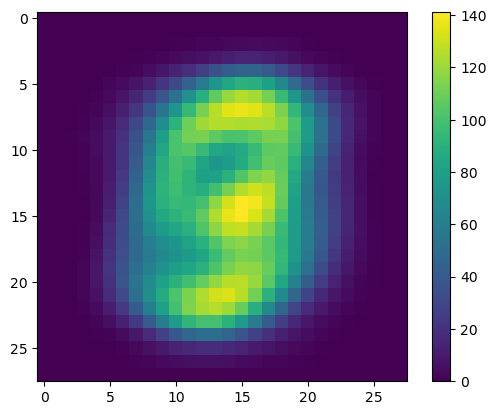

In [76]:
plt.imshow(mu.reshape(28,28))
plt.colorbar()

In [77]:
X.shape

(30000, 784)

In [78]:
30000*784

23520000

In [79]:
mu.shape

(1, 784)

In [80]:
mu

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.20000000e-03, 1.56666667e-02, 7.20000000e-03, 3.00000000e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.66666667e-04, 1.85000000e-02, 4.50333333e-02,
        5.52000000e-02, 7.26333333e-02, 8.98666667e-02, 1.16833333e-01,
        1.47933333e-01, 1.58900000e-01, 2.00933333e-01, 1.86800000e-01,
        1.55766667e-01, 1.13900000e-01, 1.04400000e-01, 7.86333333e-02,
        4.89333333e-02, 2.09333333e-02, 1.01333333e-02, 6.56666667e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

In [81]:
from numpy.linalg import svd

In [82]:
%%time 
X=X-mu #estandarizada
U,sigma,Vt=svd(X,full_matrices=False)

CPU times: user 41.9 s, sys: 11.4 s, total: 53.3 s
Wall time: 6.97 s


In [83]:
U.shape

(30000, 784)

In [84]:
U

array([[ 0.00099602, -0.00389838,  0.00031624, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00977238, -0.00408035, -0.00739555, ...,  0.08410218,
        -0.10400314, -0.04150082],
       [-0.00051909,  0.00477508,  0.00276333, ...,  0.01499787,
        -0.02000053, -0.00667844],
       ...,
       [ 0.00041416,  0.00126825, -0.0093425 , ..., -0.00033246,
        -0.00027068, -0.00046758],
       [-0.00485826,  0.0076919 ,  0.00623134, ...,  0.00100406,
         0.00097267,  0.00056117],
       [-0.00679889, -0.00313151, -0.00349736, ..., -0.00144577,
        -0.00228178,  0.00201855]])

In [85]:
sigma.shape

(784,)

In [86]:
Vt.shape

(784, 784)

In [87]:
#demostrar que sí se puede reconstruir la imagen original con SVD.(U*SIGMA*VT) 
#estamos viendo para la primer observación (la imagen en la posición 0)
samp=X[0]+mu #matriz origianal, sin moverle nada. 
z=U[0]*sigma
samp_reconstructed=z@Vt+mu

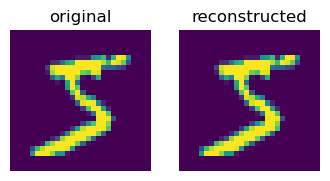

In [88]:
#vamos a ver qué tanto de la imagen original y la reconstrucci+on de la matriz son iguales. 

fig, ax= plt.subplots(1,2,figsize=(4,12)) #1 fila, 2 colunas
labels=["original","reconstructed"]
ax[0].imshow(samp.reshape(28,28))
ax[1].imshow(samp_reconstructed.reshape(28,28))

for lab,axi in zip(labels,ax): 
    axi.set_title(lab)
    axi.axis("off")

# Proyectar

In [89]:
Vt.T.shape

(784, 784)

In [90]:
Vt.T[:,:2].shape #vamos a proyectar a dos dimensiones. 
#para graficarlos y ver por qué se considera análisis no supervisado

(784, 2)

$$
    \hat X = X{\bf V}_d
$$

In [91]:
samp=X+mu #original
samp.shape

(30000, 784)

In [92]:
30000*784 #nuestra base original tiene +20 millones de datos

23520000

In [93]:
proj=samp@Vt.T[:,:2] #proyección de dos dimensiones
proj.shape

(30000, 2)

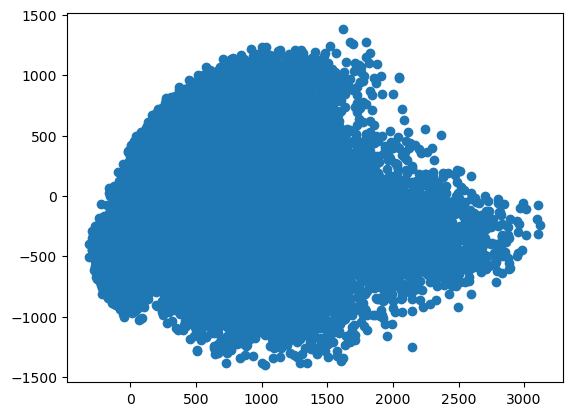

In [94]:
plt.scatter(*proj.T)
#30,000 imagenes
#NO PARECE QUE ESTÉ SEGMENTANDO O ESTÉ HACIENDO ALGO (PARACE QUE LAS 30K imagenes simplemente distribuidas ahí) No hay ningún patrón. 

In [95]:
y

array([5, 0, 4, ..., 6, 7, 1], dtype=uint8)

In [96]:
proj.shape

(30000, 2)

In [97]:
proj.T.shape

(2, 30000)

In [98]:
proj.T

array([[ 877.15710492, 1766.81348343,  723.57150495, ...,  818.17459812,
         283.71148989,   86.99011114],
       [-383.47120446, -399.11958586,  362.40925865, ...,   60.83690099,
         613.24289697, -317.5230824 ]])

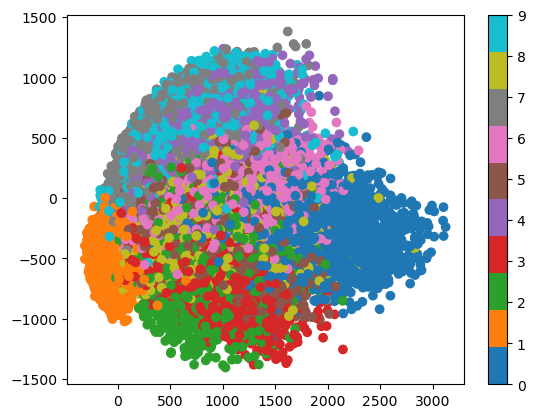

In [99]:
#aquí viene la magia, de lo más padre
plt.scatter(*proj.T,c=y,cmap="tab10")
plt.colorbar()

In [100]:
#base original= 30000*784 #base de más 20 millones de datos

#nueva 30000x2=60,000

#pasamos de 20 millones a 60 mil observaciones. 

In [101]:
#en sigma traemos información de cuanto explciada cada componente
sigma[:2]/sum(sigma)

array([0.02383376, 0.02021909])

In [102]:
#qué porcentja les explica de los acumulados de los componetes
np.cumsum(sigma[:2]/sum(sigma))[1] #me explica poco porque son sólo 2 columnas de 784

0.044052852942198975

# Reconstruyendo X

$$
\hat X = X^{\text{proj}} {\bf V}_d^T
$$

In [103]:
Vt.T.shape

(784, 784)

In [104]:
(Vt.T[:,:2]).shape

(784, 2)

In [105]:
((Vt.T[:,:2])@(Vt.T[:,:2]).T).shape
#estamos reconstruyendo la matriz original a partir del número de componentes

(784, 784)

In [106]:
X.shape

(30000, 784)

In [107]:
(X[[0],:]+mu).shape

(1, 784)

In [108]:
M1,M2

(28, 28)

In [109]:
(Vt.T[:,:2]).shape

(784, 2)

In [110]:
(Vt.T[:,:2]).T.shape

(2, 784)

In [111]:
#pip install ipywidgets
#pip install --upgrade ipywidgets

In [112]:
from ipywidgets import interact,IntSlider

In [113]:
@interact(n_components=IntSlider(min=0,max=784,step=1,value=0))
#tomar el número de componentes de Vt
def pca_reconstructed(n_components):
    V2=Vt.T[:,:n_components]
    #aquí vamos a tener la x original
    samp=X[[0],:]+mu
    #aquí hacemos la proyección de X  anuestra Vt reconstruida
    #usando sólo n_components

         #(1x784)@(784*n_components)@(n_componentsx784) = 1x784
    recov=(samp@V2@V2.T).reshape(-1,M1,M2) #lo pasa a 28x28
    plt.imshow(recov[0])
    plt.axis("off")

interactive(children=(IntSlider(value=0, description='n_components', max=784), Output()), _dom_classes=('widge…

In [114]:
#pip uninstall jupyter_nbextensions_configurator --y

# PCA en `scikit-learn`

In [115]:
from sklearn.decomposition import PCA

In [116]:
xtrain.reshape(N,-1).shape

(60000, 784)

In [117]:
N

60000

In [118]:
pca=PCA(n_components=20)
x_reduced=pca.fit_transform(xtrain.reshape(N,-1))
x_reduced.shape

(60000, 20)

In [119]:
compressed=pca.inverse_transform(x_reduced)

In [120]:
compressed.shape

(60000, 784)

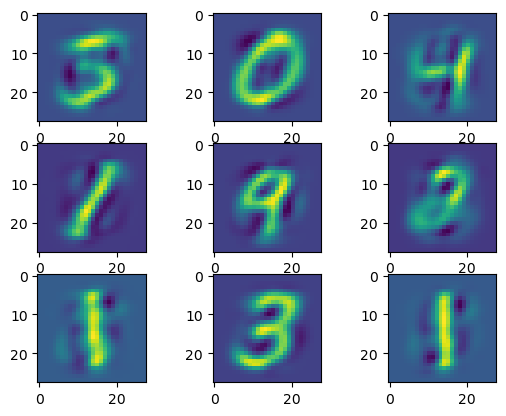

In [121]:
indices=[0,1,2,3,4,5,6,7,8,9]
fig, ax=plt.subplots(3,3)
for axi,ix in zip(ax.ravel(),indices):
    axi.imshow(compressed[ix].reshape(28,28))

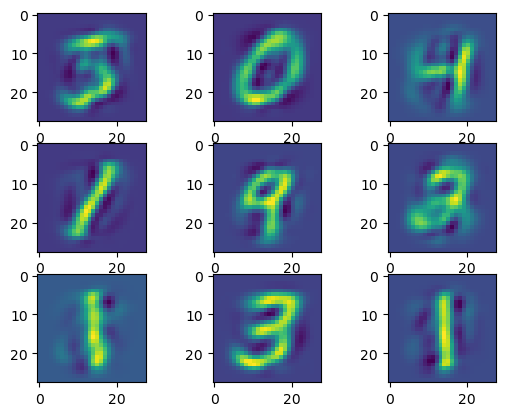

In [122]:
pca=PCA(n_components=0.70)#proporción de varianza explicada (eigenvalue/sum(eigenvalue))
x_reduced=pca.fit_transform(xtrain.reshape(N,-1))
x_reduced.shape
compressed=pca.inverse_transform(x_reduced)
indices=[0,1,2,3,4,5,6,7,8,9]
fig, ax=plt.subplots(3,3)
for axi,ix in zip(ax.ravel(),indices):
    axi.imshow(compressed[ix].reshape(28,28))

### Entrenando un modelo con PCA
Considerar `xtrain` y `ytrain` definidos en las celdas de arriba y vamos a crear DOS modelos: 

Modelo 1:  Un pipeline considerando PCA con n_components=.60 seguido de un modelo `KneighborsClassifier` con `n_neighbors=10`.

Modelo 2: `KneighborsClassifier` con `n_neighbors=10`. 

Realizar un *cross validation*  con `cv=5`. 

1. ¿Qué resultados arroja cada modelo en accuracy?
2. ¿Cuánta tarda en correr cada cross-validation?
3. ¿Qué ventajas/desventjas observan?

# Vecinos K-Nearest-Neighbors

K-vecinos es un métodos supervisado que se fija en los k-vecinos más cercanos y hace una predicción (regresión o clasificación) con base en las características de los vecinos. 

Regresión: Se utiliza un promedio de los k-vecinos más cercanos

Clasificación: Conteo/Moda

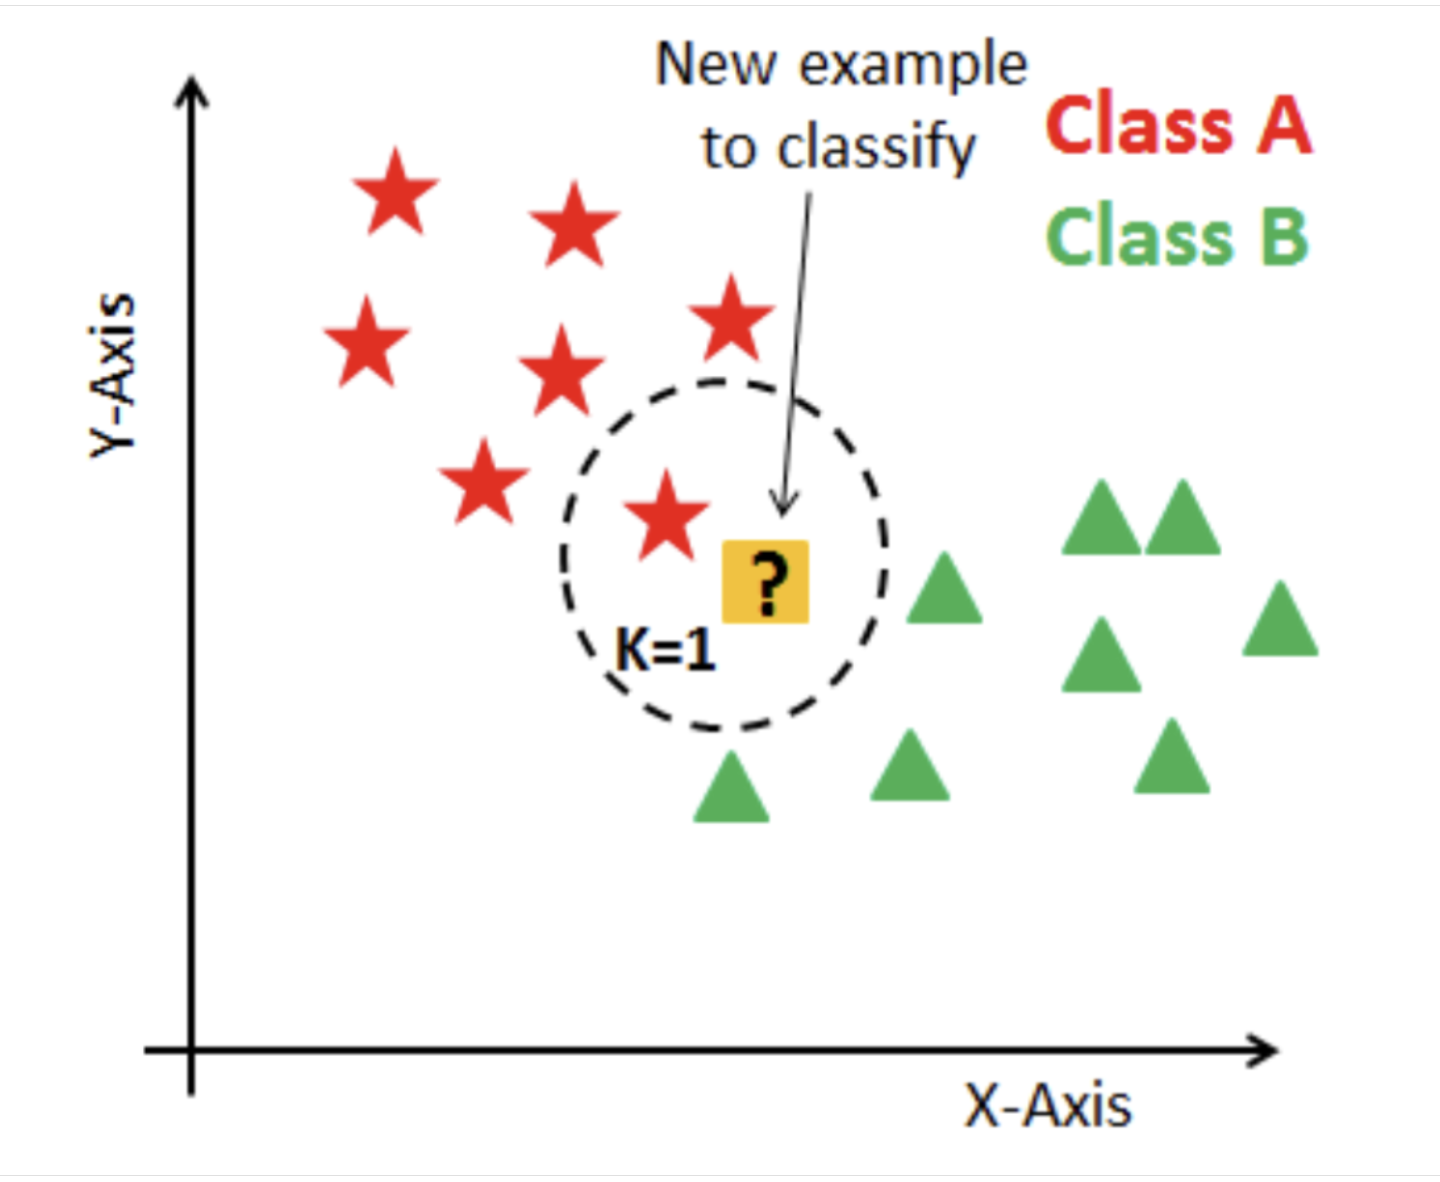

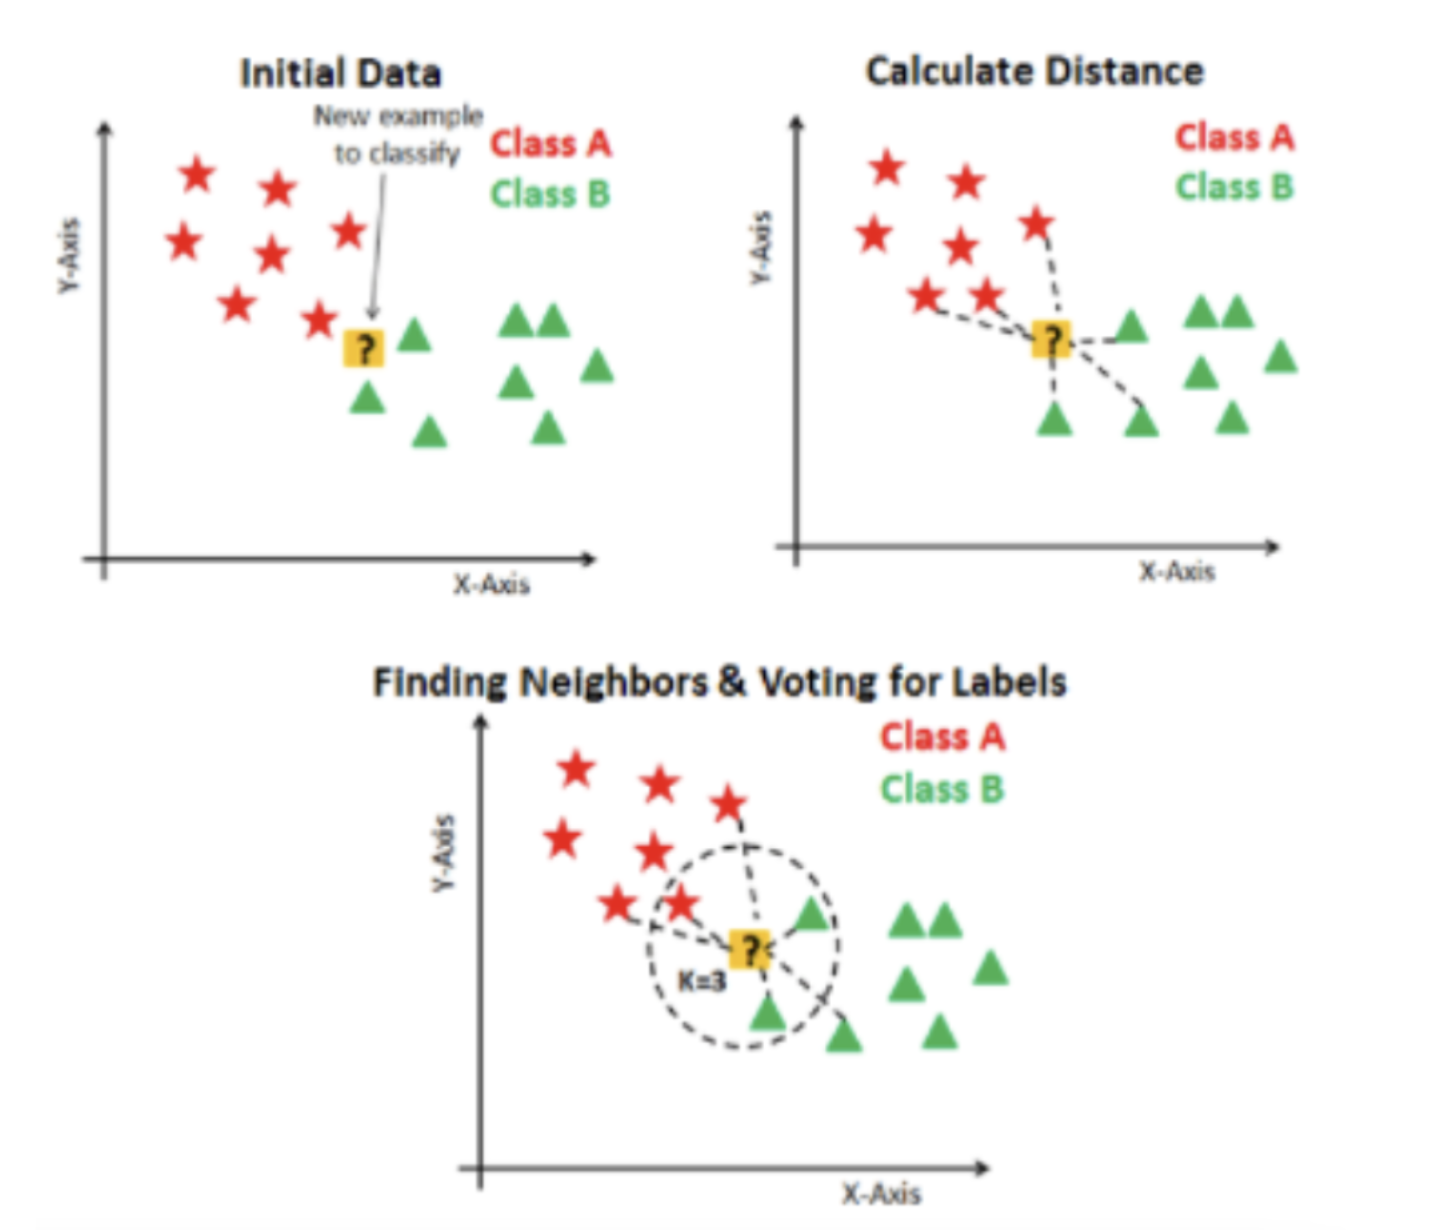

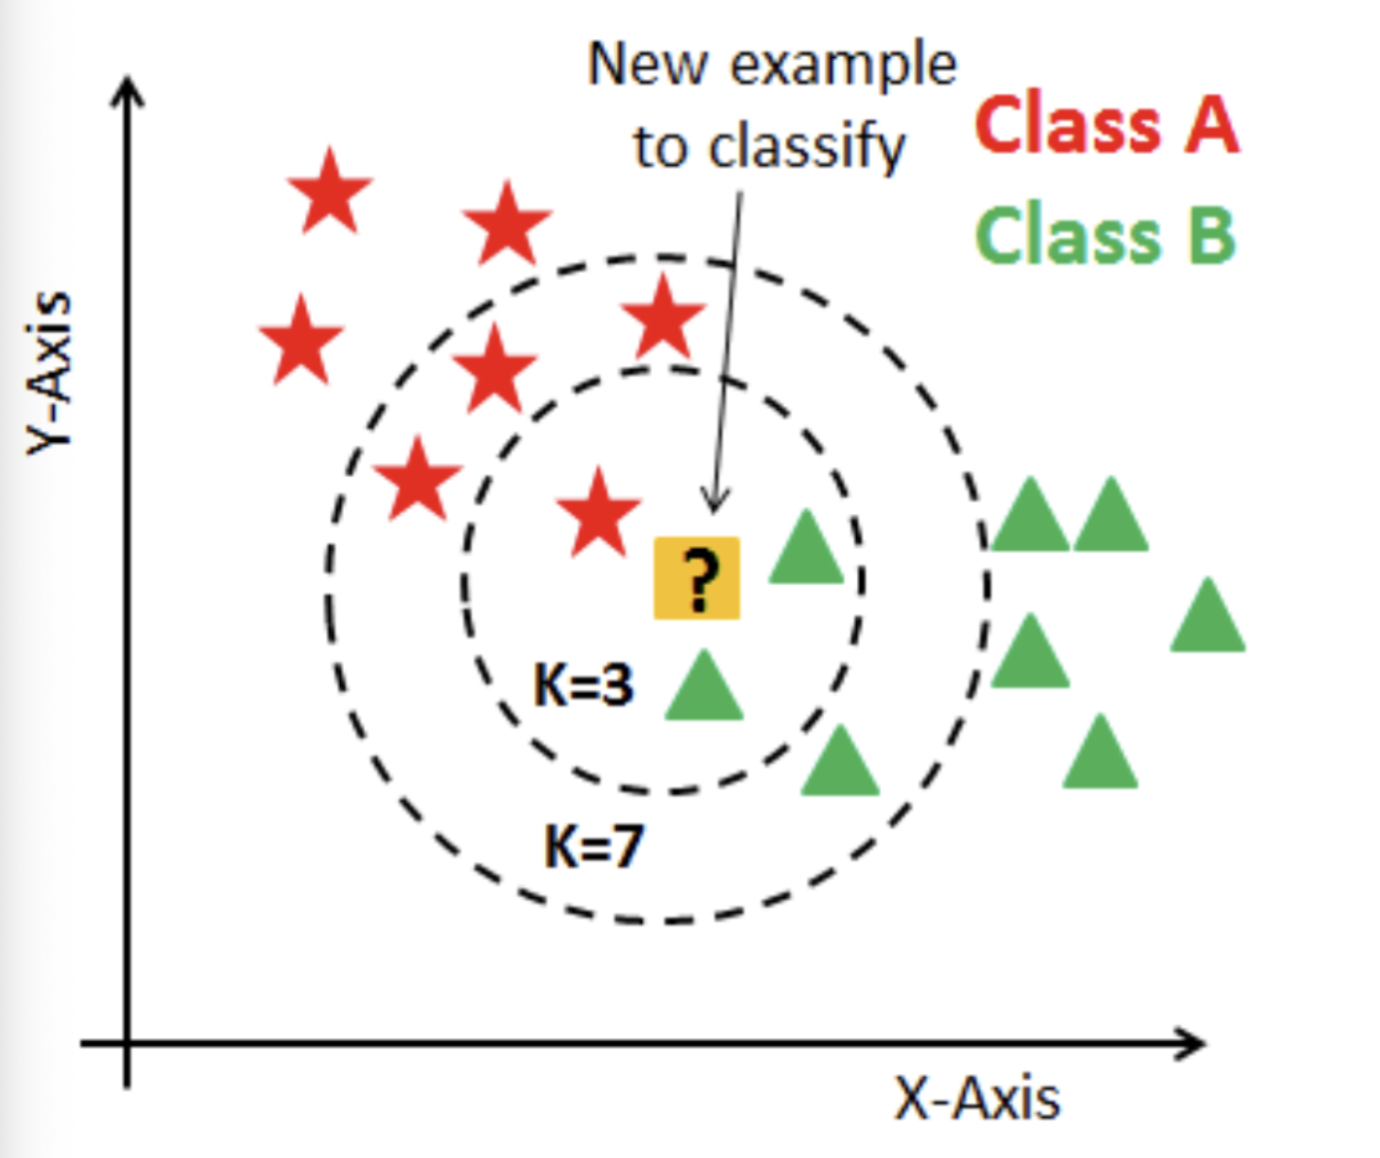

# Ejemplo de Regresión y Clasificación

In [1]:
#Ejemplo de Regresión. 

#Tenemos diez individuos con su altura (pulgadas) y su peso (en libras). 
#El objetivo es pronosticar para un nuevo individuo su peso dada su altura.. 
#¿Cuál sería su peso?

#Columna 0: Altura en Pulgadas
#Columna 1: Peso en Libras


In [2]:
reg_data = [
       [65.75, 112.99],
       [71.52, 136.49],
       [69.40, 153.03],#x      (153.03+141.46+136.46)/3
       [68.22, 142.34],
       [67.79, 144.30],
       [68.70, 123.30],
       [69.80, 141.49],#x
       [70.01, 136.46],#x
       [67.90, 112.37],
       [66.49, 127.45],
    ]

In [3]:
reg_data

[[65.75, 112.99],
 [71.52, 136.49],
 [69.4, 153.03],
 [68.22, 142.34],
 [67.79, 144.3],
 [68.7, 123.3],
 [69.8, 141.49],
 [70.01, 136.46],
 [67.9, 112.37],
 [66.49, 127.45]]

In [4]:
#pregunta: ¿Cuál sería el pronóstico de peso para una persona de 60 pulgadas?

In [5]:
#Objetivo: Definir una función de vecinos. 

#Insumos: 
    #Métrics de distancia para identicar vecina (distancia_fn)
    #datos (data)
    #a quien vamos a buscar (query)
    #el número de vecinos
    #métricas para regresión (sería promedio)
    #para clasificación (conteo/moda) (choice_fn)

In [6]:
import math
from collections import Counter

In [7]:
list(enumerate(reg_data))

[(0, [65.75, 112.99]),
 (1, [71.52, 136.49]),
 (2, [69.4, 153.03]),
 (3, [68.22, 142.34]),
 (4, [67.79, 144.3]),
 (5, [68.7, 123.3]),
 (6, [69.8, 141.49]),
 (7, [70.01, 136.46]),
 (8, [67.9, 112.37]),
 (9, [66.49, 127.45])]

In [9]:
list(enumerate(reg_data))[0]

(0, [65.75, 112.99])

In [10]:
a,b=list(enumerate(reg_data))[0]

In [11]:
#suponemos que la última columna es la etiqueta
#la x sería todo lo que no es la última. 
b[:-1]

[65.75]

In [16]:
def knn(data,query,k,distance_fn,choice_fn):
    neighbors_distance_and_indices=[]
    #1. Para cada punto hay que ir sacando distancias. 
    for index, example in enumerate(data): 
        #1.1. Calcular distancias entre mi query y las demás observaciones. 
        #Es decir, todo lo que no sea "y", es decir, las "x2. 
        distance=distance_fn(example[:-1],query)
        #1.2 Guardamos las distancias y posiciones. 
        neighbors_distance_and_indices.append((distance,index))
    #2 identificar a los más ceranos, por lo que vamos a ordenar de menor a mayor distanci. 
    sorted_neighbors_distance_and_indices=sorted(neighbors_distance_and_indices)
    #3 Quedamos con los k-vecimos más cercanos
    k_nearest_distance_and_indices=sorted_neighbors_distance_and_indices[:k]
    #4 Es supervisado, por lo que me tengo que fijar en "y". Me traigo la etiqueta. 
    #Si es regresión (etiqueta es continúa), se promedia
    #si es clasificación, que nos regrese la moda o el conteo. 
    #aquí me traigo las etiquetas del data original
    k_nearest_label=[ data[i][1] for distance, i in  k_nearest_distance_and_indices ]
    #el output son los vecinos y el promedio/conteo

    return k_nearest_distance_and_indices, choice_fn(k_nearest_label)
    

In [13]:
def mean(labels):
    return sum(labels)/len(labels)
def mode(labels):
    return Counter(labels).most_common(1)[0][0]
def euclidean_distance(point1,point2):
    sum_squared_distances=0
    for i in range(len(point1)): 
        sum_squared_distances+=math.pow(point1[i]-point2[i],2) # aquí se acumula con el "+="
    return math.sqrt(sum_squared_distances)

In [14]:
#pregunta: ¿cuál sería el pronóstico e peso para una persona de 60 pulgadas? (1 pulgadada 2.5 cm, 60 pulg =150com)
reg_query=[60]

In [18]:
reg_k_nearest_neighbors, reg_prediction= knn(data=reg_data,
                                             query=reg_query,
                                             k=3,
                                             distance_fn=euclidean_distance,
                                             choice_fn=mean)

In [19]:
reg_k_nearest_neighbors

[(5.75, 0), (6.489999999999995, 9), (7.790000000000006, 4)]

In [20]:
reg_prediction #libras

128.24666666666667

In [21]:
128.24666666666667/2 #aprox kg

64.12333333333333

In [ ]:
#En este caso, la persona de 60 pulgadas tendría un peso de 128 libras

In [33]:
#Clasificación
#Columna 0 es edad
#Columna 1 es si les gusta alguna carrera de Ingenieria. 

clf_data = [
       [22, 1],
       [23, 1],
       [21, 1],
       [18, 1],
       [19, 1],
       [25, 0],
       [27, 0],
       [29, 0],
       [31, 0],
       [39, 1],
]

In [23]:
clf_query=[33]

In [24]:
clf_k_nearest_neighbors, clf_prediction= knn(data=clf_data,
                                             query=clf_query,
                                             k=3,
                                             distance_fn=euclidean_distance,
                                             choice_fn=mode)

In [25]:
clf_k_nearest_neighbors

[(2.0, 8), (4.0, 7), (6.0, 6)]

In [26]:
clf_prediction

0

In [ ]:
#en este caso a alguien de 33 años  no le gusta alguna carrera relacionada a Ingenieria

In [28]:
#vamos hacerlo ahora con sklearn. 
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [29]:
model=KNeighborsClassifier(n_neighbors=3)

In [31]:
import pandas as pd

In [35]:
X=pd.DataFrame(clf_data).iloc[:,0].values.reshape(-1,1)
X

array([[22],
       [23],
       [21],
       [18],
       [19],
       [25],
       [27],
       [29],
       [31],
       [39]])

In [37]:
y=pd.DataFrame(clf_data).iloc[:,1].values.reshape(-1,1).ravel()
y

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1])

In [38]:
model.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

In [39]:
predicted=model.predict([[33]])
print(predicted)

[0]


In [42]:
model=KNeighborsRegressor(n_neighbors=3)
X=pd.DataFrame(reg_data).iloc[:,0].values.reshape(-1,1)
y=pd.DataFrame(reg_data).iloc[:,1].values.reshape(-1,1).ravel()
model.fit(X,y)

KNeighborsRegressor(n_neighbors=3)

In [43]:
predicted=model.predict([[60]])
print(predicted)

[128.24666667]


In [ ]:
#comprobamos que nuestra función hecha a mano da los mismo resultados que scikit-learn

# Entrenando un modelo con PCA
Considerar `xtrain` y `ytrain` definidos en las celdas de arriba y vamos a crear DOS modelos: 

Modelo 1:  Un pipeline considerando PCA con n_components=.60 seguido de un modelo `KneighborsClassifier` con `n_neighbors=10`.

Modelo 2: `KneighborsClassifier` con `n_neighbors=10`. 

Realizar un *cross validation*  con `cv=5`. 

1. ¿Qué resultados arroja cada modelo en accuracy?
2. ¿Cuánta tarda en correr cada cross-validation?
3. ¿Qué ventajas/desventjas observan?

In [123]:
from tensorflow.keras import datasets

In [124]:
train, test= datasets.mnist.load_data()

In [125]:
xtrain,ytrain=train
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [126]:
xtrain.shape

(60000, 28, 28)

In [127]:
N,M1,M2=xtrain.shape

In [128]:
xtrain.reshape(N,-1).shape

(60000, 784)

In [134]:
X=xtrain.reshape(N,-1)

In [135]:
y=ytrain

In [136]:
X.shape

(60000, 784)

In [137]:
y.shape

(60000,)

# Validación Cruzada

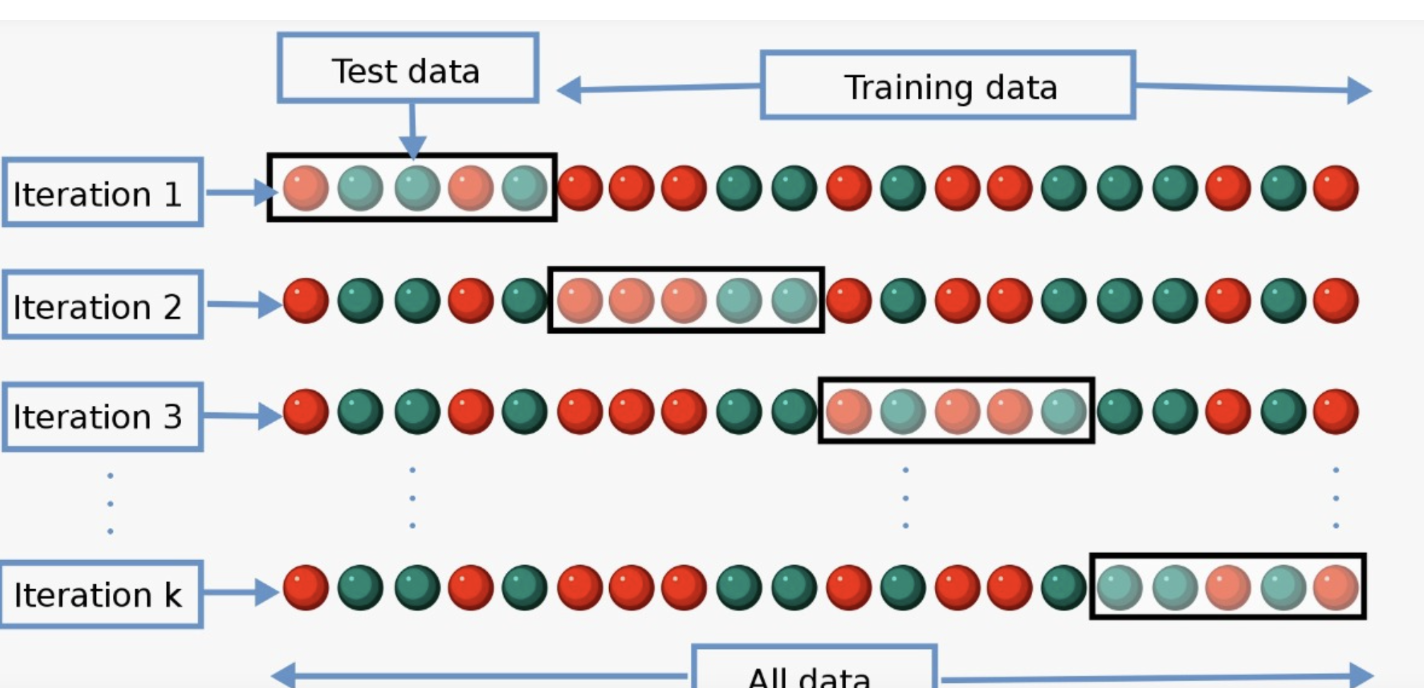

# Modelo 1:  PCA + Vecinos

In [140]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

In [147]:
%%time
miPca=PCA(n_components=0.70) #70% de la varianza explicada por eigenvalues
miKnn=KNeighborsClassifier(n_neighbors=10,n_jobs=-1)
miPipeline=Pipeline([
        ("reduccion_por_pca",miPca),
        ("clasiff_por_KNN",miKnn)
])
score=cross_val_score(miPipeline,X,y,cv=5)

CPU times: user 4min 34s, sys: 1min 8s, total: 5min 43s
Wall time: 41.7 s


In [144]:
print("Accuracy:%0.2f (+-%0.2f)"%(score.mean(),score.std()*2))

Accuracy:0.97 (+-0.00)


# Modelo 2: Vecinos

In [145]:
%%time
miKnn=KNeighborsClassifier(n_neighbors=10,n_jobs=-1)
miPipeline=Pipeline([
        ("clasiff_por_KNN",miKnn)
])
score=cross_val_score(miPipeline,X,y,cv=5)

CPU times: user 7min 17s, sys: 1min 1s, total: 8min 18s
Wall time: 1min 34s


In [146]:
print("Accuracy:%0.2f (+-%0.2f)"%(score.mean(),score.std()*2))

Accuracy:0.96 (+-0.00)


In [ ]:
#El modelo 1 tuvo un accuracy de 97% y el modelo dos un accuracy de 96%
#El modelo 1 tardó 36 seg mientras que el modelo 2 tardo 1 min 34seg
#El modelo 1 tiene un mejor accuracy y tardo casi un 66% menos de tiempo. 30 seg vs 90 seg
#El modelo 2 tiene un peor accuracy y tardó casi un 200% del tiempo 

In [148]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [149]:
y[0]

5

In [157]:
X.shape

(60000, 784)

In [152]:
miPipeline.fit(X,y)

Pipeline(steps=[('reduccion_por_pca', PCA(n_components=0.7)),
                ('clasiff_por_KNN',
                 KNeighborsClassifier(n_jobs=-1, n_neighbors=10))])

In [175]:
X[0].reshape(1,-1).shape #manera correcta

(1, 784)

In [174]:
miPipeline.predict(X[0].reshape(1,-1))

array([5], dtype=uint8)

# Vamos a Probar Nuestro Modelo con una Imagen Fuera de la Bas

In [190]:
image_path="/Users/carloscarrasco/Desktop/numero8_2.png"

In [191]:
def preprocess_image(image_path):
    image=Image.open(image_path).convert("L") #convierte escala de grises
    image=image.resize((28,28))
    image_array=np.array(image).astype('float32')#/255.0
    image_array=image_array.reshape(1,-1)
    return image_array


In [192]:
def predict_image(image_path):
    image_array=preprocess_image(image_path)
    prediction=miPipeline.predict(image_array)
    return prediction[0]

In [193]:
from PIL import Image

In [194]:
predict_image(image_path)

0